## Used this notebook only to generate plots for presentations

In [84]:
library(tidyverse)
library(viridis)
library(RColorBrewer)

### Data summary

In [3]:
data_summary = tribble(
    ~study, ~train_normal, ~train_abnormal, ~valid_normal, ~valid_abnormal,
    'Elbow', 1094, 660, 92, 66,
    'Finger', 1280, 655, 92, 83,
    'Hand', 1497, 521, 101, 66,
    'Humerus', 321, 271, 68, 67,
    'Forearm', 590, 287, 69, 64,
    'Shoulder', 1364, 1457, 99, 95,
    'Wrist', 2134, 1326, 140, 97
)

In [12]:
data_summary <- data_summary %>%
    mutate(train_total = train_normal + train_abnormal,
           valid_total = valid_normal + valid_abnormal,
           total = train_total + valid_total)

In [42]:
data_summary

study,train_normal,train_abnormal,valid_normal,valid_abnormal,train_total,valid_total,total
Elbow,1094,660,92,66,1754,158,1912
Finger,1280,655,92,83,1935,175,2110
Hand,1497,521,101,66,2018,167,2185
Humerus,321,271,68,67,592,135,727
Forearm,590,287,69,64,877,133,1010
Shoulder,1364,1457,99,95,2821,194,3015
Wrist,2134,1326,140,97,3460,237,3697


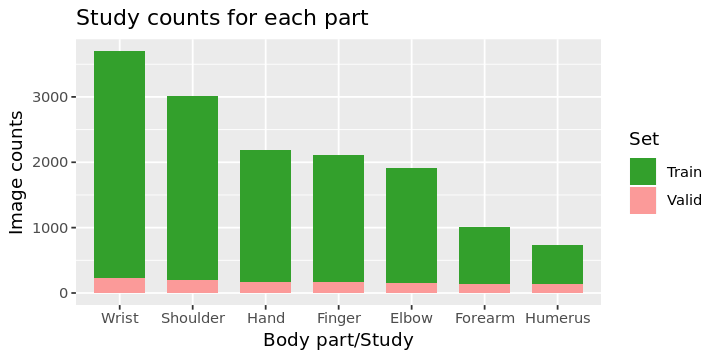

In [206]:
options(repr.plot.width=6, repr.plot.height=3)
count_plot <- data_summary %>%
    select(study, train_total, valid_total, total) %>%
    gather(key='set', value='count', -study, -total) %>%
    ggplot(aes(x=reorder(study, -total), y=count)) +
    geom_col(aes(fill=set), width=0.7) +
    labs(x='Body part/Study', y='Image counts', title='Study counts for each part') +
    scale_fill_manual("Set", values=c('#33a02c', '#fb9a99'), 
                      labels=c('Train', 'Valid')) 
count_plot

This plot shows the number of images we have for each study, according to the set. We see that the dataset has a high number of images for parts like Wrist and Shoulder (I guess they break easy) and a low count for Humerus. Humeus has about a third of the images in valid. 

In [207]:
ggsave('../plots/study_counts_for_part.png', plot = count_plot, height = 3, width = 6)

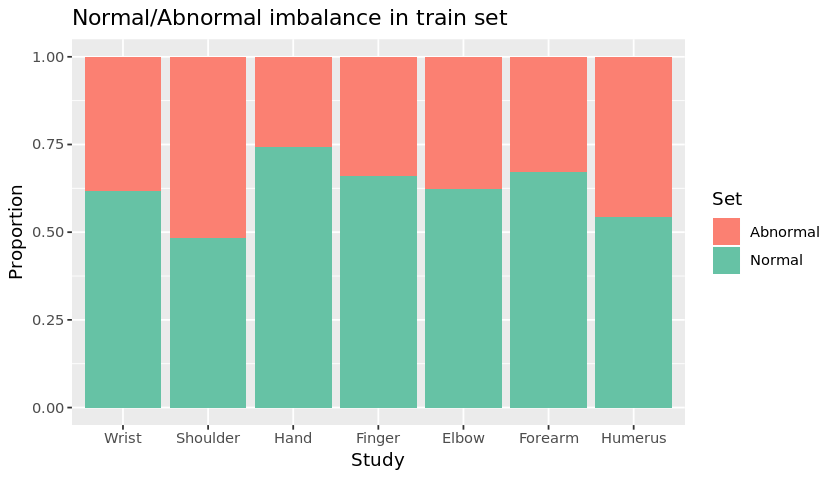

In [203]:
options(repr.plot.width=7, repr.plot.height=4)
imbalance_plot <- data_summary %>%
    select(study:train_abnormal, train_total) %>%
    mutate(normal = train_normal / train_total,
           abnormal = train_abnormal / train_total) %>%
    select(-train_normal, -train_abnormal) %>%
    gather(key="study_result", value="prop", normal, abnormal)  %>%
    ggplot() +
    geom_col(aes(x=reorder(study, -train_total), y=prop, 
                 fill=study_result)) +
    scale_fill_manual("Set", values=c('#fb8072', '#66c2a5'), 
                      labels=c('Abnormal', 'Normal')) +
    labs(x='Study', y='Proportion', title='Normal/Abnormal imbalance in train set')
imbalance_plot

In [205]:
ggsave('../plots/normal_abnormal_for_train.png', plot = imbalance_plot, height = 4, width = 7)